In [11]:
# Data exploration snippet
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D,MaxPool2D
from keras.models import Model ,Sequential
from keras.preprocessing import image
from keras.optimizers import RMSprop
import seaborn as sns
import scipy
import itertools

%matplotlib inline
%load_ext autoreload
%autoreload 2

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def plot_confusion_matrix(y_true,y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = confusion_matrix(y_true,y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print("accuracy score = {} ".format(accuracy_score(y_true,y_pred)))

In [3]:
df = pd.read_csv("./data/train.csv",sep=",")
df_test = pd.read_csv("./data/test.csv",sep=",")
df.shape

(42000, 785)

In [4]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=27)


In [217]:
x_train = x_train/255
x_test = x_test / 255

In [5]:
y_train2 = to_categorical(y_train, num_classes = 10)
y_train2.shape

(31500, 10)

# First cnn model

In [6]:
def mnist_model(input_shape):
    """
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(10, activation='softmax', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs=X_input, outputs=X, name='mnist')

    return model
    ### END CODE HERE ###
    
    return model

In [ ]:
x_train.shape[1:] , np.array(x_train.iloc[0,:]).reshape((-1,28,28,1)).shape

In [7]:
model1  = mnist_model(np.array(x_train.iloc[0,:]).reshape((-1,28,28,1)).shape[1:])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model1.compile('rmsprop', 'categorical_crossentropy', metrics=['accuracy'])

In [9]:
model1.fit(np.array(x_train).reshape(-1,28,28,1), y_train2, epochs=6, batch_size=6000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/6
31500/31500 [==============================] - ETA: 1:45 - loss: 3.1917 - acc: 0.048 - ETA: 1:18 - loss: 4.6991 - acc: 0.150 - ETA: 53s - loss: 5.7359 - acc: 0.195 - ETA: 29s - loss: 5.7709 - acc: 0.19 - ETA: 6s - loss: 5.8018 - acc: 0.2349 - 126s 4ms/step - loss: 5.7744 - acc: 0.2433
Epoch 2/6
31500/31500 [==============================] - ETA: 1:51 - loss: 4.0841 - acc: 0.489 - ETA: 1:21 - loss: 3.9952 - acc: 0.544 - ETA: 55s - loss: 3.4290 - acc: 0.554 - ETA: 30s - loss: 2.8045 - acc: 0.58 - ETA: 6s - loss: 2.5050 - acc: 0.6019 - 128s 4ms/step - loss: 2.4340 - acc: 0.6087
Epoch 3/6
31500/31500 [==============================] - ETA: 1:43 - loss: 0.6704 - acc: 0.766 - ETA: 1:19 - loss: 0.6583 - acc: 0.770 - ETA: 54s - loss: 0.6596 - acc: 0.776 - ETA: 29s - loss: 0.6212 - acc: 0.78 - ETA: 5s - loss: 0.6090 - acc: 0.7916 - 124s 4ms/step - loss: 0.6031 - acc: 0.7933
Epoch 4/6
31500/31500 [==============================] - ETA: 1:

In [15]:
v_test = model1.predict(np.array(x_test).reshape(-1,28,28,1),verbose=1)

10500/10500 [==============================] - ETA: 13 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ET

In [31]:
a=np.zeros(len(v_test))
a

array([0., 0., 0., ..., 0., 0., 0.])

In [36]:
np.flatnonzero(v_test[0] == max(v_test[0]))

array([2], dtype=int64)

In [37]:
v_test = model1.predict(np.array(x_test).reshape(-1,28,28,1),verbose=1)
a = np.zeros(len(v_test))
for i in range(len(v_test)):
    a[i] = (np.flatnonzero(v_test[i] == max(v_test[i])))

accuracy score = 0.8591428571428571 


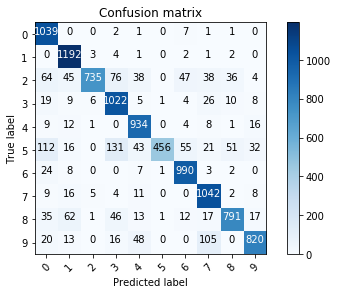

In [39]:
plot_confusion_matrix(y_test,a,np.arange(10))

In [49]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 34, 34, 1)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 28, 28, 32)        1600      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 28, 28, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
__________

# With sequential model


In [218]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [219]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [220]:
model.fit(np.array(x_train).reshape(-1,28,28,1), y_train2, epochs=20, batch_size=6000)

Epoch 1/20
31500/31500 [==============================] - ETA: 2:31 - loss: 2.3066 - acc: 0.093 - ETA: 2:19 - loss: 2.2613 - acc: 0.139 - ETA: 1:34 - loss: 2.1780 - acc: 0.203 - ETA: 50s - loss: 2.1843 - acc: 0.235 - ETA: 9s - loss: 2.1775 - acc: 0.2859 - 203s 6ms/step - loss: 2.1514 - acc: 0.2994
Epoch 2/20
31500/31500 [==============================] - ETA: 2:23 - loss: 1.1467 - acc: 0.603 - ETA: 1:51 - loss: 1.8036 - acc: 0.463 - ETA: 1:14 - loss: 1.8183 - acc: 0.482 - ETA: 40s - loss: 1.7059 - acc: 0.516 - ETA: 8s - loss: 1.5456 - acc: 0.5617 - 173s 5ms/step - loss: 1.5050 - acc: 0.5723
Epoch 3/20
31500/31500 [==============================] - ETA: 2:14 - loss: 0.9299 - acc: 0.687 - ETA: 1:40 - loss: 0.9370 - acc: 0.686 - ETA: 1:15 - loss: 0.8688 - acc: 0.712 - ETA: 42s - loss: 0.7871 - acc: 0.741 - ETA: 8s - loss: 0.7369 - acc: 0.7563 - 183s 6ms/step - loss: 0.7304 - acc: 0.7576
Epoch 4/20
31500/31500 [==============================] - ETA: 2:25 - loss: 0.5990 - acc: 0.789 - ETA: 

## Inspect the model

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [13]:
plot_model(model,to_file='',show_shapes=True)

In [70]:
model.inputs, model.outputs

([<tf.Tensor 'conv2d_1_input:0' shape=(?, 28, 28, 1) dtype=float32>],
 [<tf.Tensor 'dense_2/Softmax:0' shape=(?, 10) dtype=float32>])

<strong>Les poids w ->0 et  les biais ->1

In [80]:
model.get_layer(index=0).get_weights()[0][:, :, 0, :].transpose()

array([[[-2.55971383e-02, -8.36343877e-03, -3.94603983e-02,
         -2.02950183e-02,  3.78381312e-02],
        [ 1.81059111e-02, -6.58091009e-02, -4.51099314e-02,
         -3.62211056e-02, -6.51006307e-03],
        [ 3.69300395e-02,  2.62171626e-02, -4.58210371e-02,
          1.61531623e-02, -5.46660088e-02],
        [ 7.79380128e-02,  1.56106707e-02,  3.14419391e-04,
         -7.38138705e-02, -7.00887442e-02],
        [-7.46642873e-02, -2.28067935e-02,  5.21267354e-02,
         -6.84974417e-02, -5.85316345e-02]],

       [[-3.92559916e-02,  3.66619192e-02, -7.12817237e-02,
         -6.08865842e-02, -7.97285289e-02],
        [-2.74445564e-02,  3.02143302e-02, -3.57721411e-02,
         -2.07256991e-02, -1.51114818e-02],
        [ 5.43111078e-02, -1.89159587e-02,  3.88056971e-02,
          7.34041855e-02,  7.00135306e-02],
        [ 7.59511394e-03, -7.89993629e-02, -7.89060742e-02,
         -4.80260700e-03,  8.39017052e-03],
        [-5.18507045e-03,  2.72360221e-02,  2.15469636e-02,
  

<strong> Les filtres de la deuxieme couche contiennent bien 32 channels

In [93]:
model.get_layer(index=1).get_weights()[0][:, :, :, 0].transpose()

array([[[-1.32804271e-02, -2.06501391e-02, -5.84269166e-02,
         -1.42208803e-02, -5.16522303e-02],
        [-1.84736084e-02, -3.98098454e-02,  2.41466910e-02,
          2.12760344e-02,  5.85809872e-02],
        [ 1.00449566e-02,  7.90463760e-03, -9.27439518e-03,
         -2.41149892e-03, -5.38472794e-02],
        [-6.45924285e-02,  4.34617028e-02,  1.70263108e-02,
         -4.74233599e-03, -5.07579781e-02],
        [ 9.00409184e-03, -6.43019974e-02, -5.10638170e-02,
         -3.05785965e-02, -3.16232368e-02]],

       [[-2.22110078e-02, -5.09795472e-02,  2.66171787e-02,
          3.51052955e-02,  5.69947958e-02],
        [ 8.22903682e-03, -2.00921353e-02, -1.84969716e-02,
          1.62793379e-02, -3.36558446e-02],
        [-1.77570507e-02,  5.40284067e-02,  9.89691354e-03,
          3.99574377e-02,  3.55980285e-02],
        [-1.44190406e-02,  5.72222285e-02, -4.76861149e-02,
         -2.49113012e-02,  1.65463164e-02],
        [-1.77580584e-02, -5.84335662e-02,  1.32560348e-02,
  

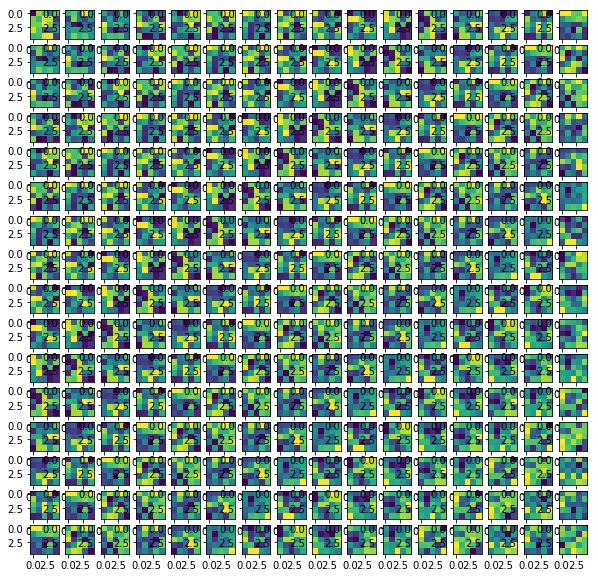

In [222]:
fig,ax = plt.subplots(ncols=16,nrows=16,figsize=(10,10))
for i in range(16):
    for j in range(16):
        ax[i,j].imshow(model.get_layer(index=0).get_weights()[0][:, :, 0, i+j]) 

Final understanding


In [127]:
(model.get_layer(index=0).get_weights()[0].shape,
model.get_layer(index=1).get_weights()[0].shape)

((5, 5, 1, 32), (5, 5, 32, 32))

<strong> tensorflow convention = height , width , ninput channel , noutput channel

In [124]:
model.get_layer(index=1).get_weights()[0][:,:,0,0]

array([[-0.01687712, -0.041183  , -0.00167459, -0.06111418,  0.01604328],
       [-0.03836048, -0.03575343,  0.00351429,  0.02825194, -0.08515962],
       [-0.07659471,  0.04033729, -0.01756394,  0.01144909, -0.07076894],
       [-0.01893819,  0.0256648 , -0.01191355, -0.01340903, -0.03798378],
       [-0.04991491,  0.06408483, -0.04719064, -0.03347693, -0.01751619]],
      dtype=float32)

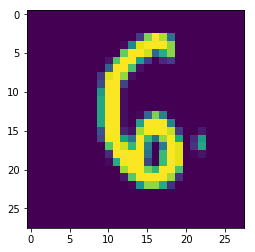

In [214]:
fix,ax = plt.subplots()
ax.imshow(np.array(x_train.iloc[2,:]).reshape(28,28))

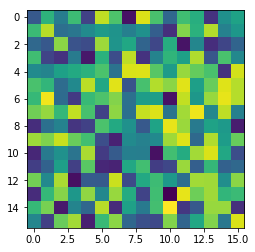

In [223]:
#Before training the model
fix,ax = plt.subplots()
ax.imshow(model.get_layer(index=11).get_weights()[0].transpose()[5].reshape((16,16)))


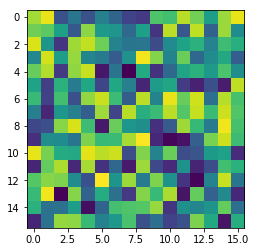

In [227]:
#After training the model
fix,ax = plt.subplots()
ax.imshow(model.get_layer(index=11).get_weights()[0][:,2].reshape(16,16))

In [231]:
model.get_layer(index=9).get_weights()[0][0,:].reshape(16,16)

array([[ 0.04558267,  0.0373159 , -0.00411224,  0.02444291, -0.03358156,
         0.03963529, -0.03665774, -0.0209851 ,  0.02599514,  0.00126554,
         0.04529781, -0.02590906, -0.03004028,  0.01931624,  0.01428853,
         0.01951426],
       [-0.00956575,  0.0071224 , -0.00490674,  0.02644381,  0.03177392,
         0.03772904,  0.01369275,  0.01168915, -0.04161544, -0.0237053 ,
         0.0128195 , -0.04697114, -0.01752581,  0.01531886,  0.06982271,
         0.03545581],
       [ 0.05114127, -0.02736197, -0.00539203,  0.02760661,  0.0001069 ,
         0.03953057, -0.02664075,  0.00997571, -0.04077222,  0.00765112,
         0.033295  ,  0.04258475,  0.00434836, -0.01897405, -0.01419902,
         0.02465115],
       [ 0.05013106,  0.05646442,  0.03232662, -0.01930676, -0.04940951,
        -0.01529652,  0.02501626,  0.00707693,  0.04153833, -0.01479641,
         0.01892339, -0.02211181, -0.0501653 , -0.0172857 , -0.0323735 ,
        -0.00531909],
       [-0.03776271,  0.03208892, -0

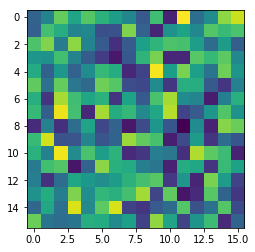

In [235]:
#After training the model
fix,ax = plt.subplots()
ax.imshow(model.get_layer(index=9).get_weights()[0][255,:].reshape(16,16))

## Inspect the output of the first layer

In [190]:
16*16

256

In [236]:
v_test2 = model.predict(np.array(x_test).reshape(-1,28,28,1),verbose=1)
a2 = np.zeros(len(v_test2))
for i in range(len(v_test2)):
    a2[i] = (np.flatnonzero(v_test2[i] == max(v_test2[i])))

10500/10500 [==============================] - ETA: 1: - ETA: 33s - ETA: 24 - ETA: 20 - ETA: 18 - ETA: 17 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA: 

accuracy score = 0.9855238095238095 


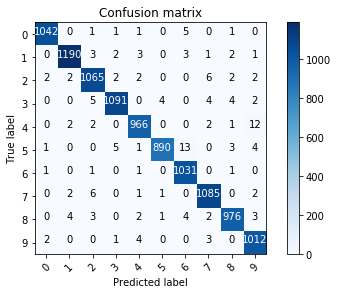

In [237]:
plot_confusion_matrix(y_test, a2 , np.arange(10))

In [238]:
v_test2 = model.predict(np.array(df_test/255).reshape(-1,28,28,1),verbose=1)
a2 = np.zeros(len(v_test2))
for i in range(len(v_test2)):
    a2[i] = (np.flatnonzero(v_test2[i] == max(v_test2[i])))

28000/28000 [==============================] - ETA: 34 - ETA: 34 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 26 - ETA: 27 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA

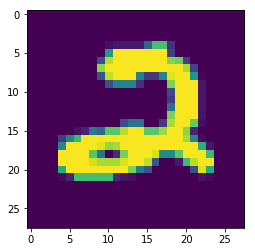

In [246]:
fig , ax = plt.subplots()
ax.imshow(np.array(df_test.iloc[0,:]).reshape(28,28))

In [248]:
df_sub = pd.DataFrame({"ImageId":np.arange(1,df_test.shape[0]+1),
             "label":a2})

In [250]:
df_sub.head(1)

,ImageId,label
0,1,2.0


In [251]:
df_sub.label = df_sub.label.astype("int")

In [252]:
df_sub.head(1)

,ImageId,label
0,1,2


In [253]:
df_sub.to_csv("submission_cnn_simple.csv",index=False,sep=",")

# Optimize model

## Better weight initialisation

## adding distorted data

## Changing the optimizer

##  adam learning rate